## Subsampling analysis

subsample the number of inidvidualas/RNA-seq datasets and look at how number of signals changes

In [1]:
import pandas as pd
import numpy as np
import os
import yaml
import seaborn as sns
import matplotlib.pyplot as plt


prefix = '/home/klawren/oak/pcqtls'

### create the subsampled expression and covar files
this only needs to be run once

In [2]:
# get outputs from a config file
config_path= f'{prefix}/config/proteincoding_main.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

tissue_id_path = config['tissue_id_path']
clusters_dir = config['clusters_dir']
expression_dir = config['expression_dir']
covariates_dir = config['covariates_dir']

tissue_df = pd.read_csv(f"{prefix}/{tissue_id_path}", header=0)
tissue_ids = list(tissue_df['Tissue'])
tissue_id = 'Cells_Cultured_fibroblasts'

In [10]:
num_samples = []
for tissue_id in tissue_ids:
        covariates_df = pd.read_csv(f'{prefix}/{covariates_dir}/{tissue_id}.v8.covariates.txt', sep='\t', index_col=0).T
        num_samples.append(len(covariates_df.index))

465

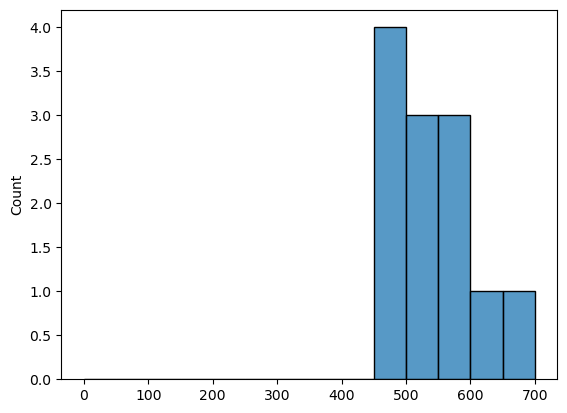

In [13]:
sns.histplot(num_samples, bins=np.arange(0, max(num_samples), 50))
min(num_samples)

In [14]:
# minimum of 300 in each tissue, I'll do 100, 200, 300

for num_samples in [450]:
    output_dir = f'{prefix}/data/processed/subsampling/{num_samples}'
    os.mkdir(output_dir)
    os.mkdir(f'{output_dir}/covariates/')
    os.mkdir(f'{output_dir}/normalized_expression/')

    for tissue_id in tissue_ids:
        # load in each expression and covariates files
        expression_df = pd.read_csv(f'{prefix}/{expression_dir}/{tissue_id}.v8.normalized_expression.bed', sep='\t')
        covariates_df = pd.read_csv(f'{prefix}/{covariates_dir}/{tissue_id}.v8.covariates.txt', sep='\t', index_col=0).T

        if len(covariates_df.index) > num_samples:
            selected_samples = covariates_df.index[:num_samples].values

            # write out first x as a subset
            sub_expression = expression_df[np.concatenate([expression_df.columns[:4].values, selected_samples])]
            sub_expression.to_csv(f'{output_dir}/normalized_expression/{tissue_id}.v8.normalized_expression.bed', sep='\t', index=None)

            sub_covar = covariates_df.loc[selected_samples]
            sub_covar.T.to_csv(f'{output_dir}/covariates/{tissue_id}.v8.covariates.txt', sep='\t')

In [ ]:
# try with a random selection of 100 rather than the first 100
for num_samples in [100]:
    output_dir = f'{prefix}/data/processed/subsampling/{num_samples}_rand'
    try:
        os.mkdir(output_dir)
        os.mkdir(f'{output_dir}/covariates/')
        os.mkdir(f'{output_dir}/normalized_expression/')
    except FileExistsError:
        pass

    for tissue_id in tissue_ids:
        # load in each expression and covariates files
        expression_df = pd.read_csv(f'{prefix}/{expression_dir}/{tissue_id}.v8.normalized_expression.bed', sep='\t')
        covariates_df = pd.read_csv(f'{prefix}/{covariates_dir}/{tissue_id}.v8.covariates.txt', sep='\t', index_col=0).T

        selected_samples = pd.Series(covariates_df.index.values).sample(num_samples)

        sub_expression = expression_df[np.concatenate([expression_df.columns[:4].values, selected_samples])]
        sub_expression.to_csv(f'{output_dir}/normalized_expression/{tissue_id}.v8.normalized_expression.bed', sep='\t', index=None)

        sub_covar = covariates_df.loc[selected_samples]
        sub_covar.T.to_csv(f'{output_dir}/covariates/{tissue_id}.v8.covariates.txt', sep='\t')